# Analysis of Amazon Food Review Dataset

## Source of the Dataset

Data Source:https://www.kaggle.com/snap/amazon-fine-food-reviews

## Description of the Dataset

This dataset consists of the reviews given by various customers about the fine foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories. The various properties of the dataset may be summarised as follows :

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 <br>

![title](https://www.urbanpapyrus.com/wp-content/uploads/2018/04/AmazonFresh-Amazon-India-Amit-Agarwal-Urban-Papyrus.jpg)


## Attributes present in the dataset and  their description

This dataset is basically a single sqlite file, which contains the following attributes:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

## Objective

This is a classification based problem. Given a review , we need to classify whether it is a positive or negative review. In this dataset we define the positive and negative review based on the attribute **Score**. 
<p> **if score > 3 : <br>
        review is positive <br>
     else if score < 3 : <br>
        review is negative <br> **
      
        

In [42]:
# import the Python libraries which will provide the functions that enable us to perform the Analysis 
import sqlite3
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors



In [43]:
# Read the dataset from the database file
dbconnect = sqlite3.connect('database.sqlite') 
# Test whether the dataset has been loaded properly and we get only the essential and required data from the query  
required_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, dbconnect)

In [44]:
# Function to replace the scores with the appropriate labels according to the condition mentioned in the objective
def label_data(x):
    if x < 3 :
        return 'negative'
    return 'positive'

In [45]:
# Code to modify the Score attribute according to the condition mentioned above and using the function in the previous cell 
original_score = required_data['Score']
label_pos_neg = original_score.map(label_data)
required_data['Score'] = label_pos_neg

In [46]:
# Code to print all the filtered data from the dataset 
required_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [47]:
# Here the number of rows and columns are given as a tuple. The first part represent the number of rows and the second part represents the number of columns
print(required_data.shape)

(525814, 10)


## Observation

The required data from the dataset with which we will work with contains 525814 rows and 10 columns. Hence there are 525814 datapoints, 9 features and 1 class label.

In [48]:
# Code to see the first five datapoints of the dataset
required_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [49]:
# Code to print the columns which are present in the dataset
required_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
# nltk.download()

## 1. Data Cleaning : Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [50]:
# Code to show that some aspects of some data are duplicated which is not beneficial to the model.
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", dbconnect)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


## Observation

As can be seen above the same user has multiple reviews of the with the same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text  and on doing analysis it was found that <br>
<br> 
ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)<br>
<br> 
ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on<br>

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.<br>

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [51]:
#Sorting data according to ProductId in ascending order
sorted_data=required_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#Test whether the sorting functionality has been performed
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [52]:
#Test whether the sorting functionality has been performed
sorted_data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
176791,191721,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,negative,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w..."
1362,1478,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,negative,1345852800,weak coffee not good for a premium product and...,"This coffee supposedly is premium, it tastes w..."
303285,328482,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,positive,1331856000,Perfect,The basket was the perfect sympathy gift when ...
5259,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...
302474,327601,B009WVB40S,A3ME78KVX31T21,K'la,0,0,positive,1351123200,Tasty!,I purchased this to send to my son who's away ...


In [53]:
# Deduplication of entries
final_data =sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
# Number of datapoints in the dataset after deduplication
final_data.shape

(364173, 10)

In [54]:
#Checking to see how much % of data still remains
(final_data['Id'].size*1.0)/(required_data['Id'].size*1.0)*100

69.25890143662969

## Observation 

After performing the above data cleaning operation about 69.25% of the required data still remains.

## Observation about  the remaining data
<b>Observation:-</b> It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calculations. An eample of this is shown using the below code snippet.

In [55]:
# Code to show that some datapoints had entries where HelpfulnessNumerator > HelpfulnessDenominator which is impossible to occur
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", dbconnect)

display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [56]:
# Code to remove those datapoints whose HelpfulnessNumerator > HelpfulnessDenominator and contain only those datapoints whose HelpfulnessNumerator<HelpfulnessDenominator
final_data=final_data[final_data.HelpfulnessNumerator<=final_data.HelpfulnessDenominator]
# Number of datapoints after doing the previous data cleaning
final_data.shape

(364171, 10)

## Observation

After performing all the cleaning operation, now we have 364171 rows and 10 columns. So finally we have 364171 datapoints, 9 features and 1 class label on which we will work upon

In [57]:
# Finding the number of values or data present for each type of class in the final dataset after performing data cleaning
final_data['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [58]:
# Finding the percentage of datapoints for each type of class
print("the percentage of datapoints for each type of class are:")
final_data['Score'].value_counts() * 100 / final_data.shape[0]

the percentage of datapoints for each type of class are:


positive    84.317807
negative    15.682193
Name: Score, dtype: float64

In [59]:
# Code to provide a generalized information about the finalied data 
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364171 entries, 138706 to 302474
Data columns (total 10 columns):
Id                        364171 non-null int64
ProductId                 364171 non-null object
UserId                    364171 non-null object
ProfileName               364171 non-null object
HelpfulnessNumerator      364171 non-null int64
HelpfulnessDenominator    364171 non-null int64
Score                     364171 non-null object
Time                      364171 non-null int64
Summary                   364171 non-null object
Text                      364171 non-null object
dtypes: int64(4), object(6)
memory usage: 30.6+ MB


## Observation

The final dataset contains 307061 datapoints belonging to positive class and 57110 datapoints belonging to negative class. Thus approimately 84.3% of the data belongs to positive class and 15.6% of the data belongs to negative class. Since there is a large difference between the data belonging to different classes so it is an **imbalanced dataset**

In [20]:
# Due to memory constraint and lack of gpu we are taking only first 2k datapoints of the dataset
#final_data=final_data[0:2000]

##  2.  Text Preprocessing: Stemming, stop-word removal and Lemmatization.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

# Stemming and Lemmatization

For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

<p>The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:</p>

<p>am, are, is => be <br> 
car, cars, car's, cars' => car </p>
<p>The result of this mapping of text will be something like: </p>
<p>the boy's cars are different colors => the boy car be differ color</p>

<p>However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.</p>



# 2.1 Removal of HTML Tags , punctuations and special characters

##  2.1.1 Find sentences containing HTML Tags

In [60]:
# find sentences containing HTML tags
import re
i=0;
for sent in final_data['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

6
I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.


## 2.1.2 Defining the data cleaning operations which needs to be performed

In [61]:
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty')) # Test the Snowball stemmer

{"you'd", "you're", 'yourselves', 'is', 'here', 'shan', 'didn', 'an', 'their', 'because', 'under', 'shouldn', 'on', 'both', 'down', 'hers', 'he', 'now', "doesn't", "hadn't", 'few', 'been', 'up', 'its', 'some', 'herself', 'theirs', 'while', "needn't", 'other', 'her', "haven't", 'what', 'she', 'so', 'do', 'where', 'isn', "don't", 'between', 'from', 'it', "you've", 'out', 'couldn', 'again', 'having', 'any', 'just', 'needn', 'own', 'does', 'am', 'no', "mustn't", "shan't", 's', 'were', 'until', 'you', 'with', 'hasn', 'yours', 'once', 't', "she's", 'into', 'did', "it's", 'me', 'then', 'had', 'whom', 'and', 'over', "aren't", 'to', 'aren', 'than', 'your', 'him', 'in', "weren't", 'll', 'mustn', 'being', 'doing', 'by', 'through', "mightn't", 'a', 'i', 'that', 'be', 'such', 'all', 'myself', 're', 've', "isn't", 'during', 'his', 'haven', 'yourself', 'off', 'mightn', 'can', "wasn't", 'most', 'there', 'about', 'more', 'how', 'don', 'who', 'but', 'my', 'not', 'itself', 'against', 'won', 'ourselves', 

## 2.1.3 Performing the data cleaning operations in a step by step manner

In [62]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final_data['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final_data['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final_data['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [63]:
final_data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
final_data['CleanedText']=final_data['CleanedText'].str.decode("utf-8")

In [64]:
#Below the processed review can be seen in the CleanedText Column
final_data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


# 3. Analysis of words in Positive and Negative Reviews


## 3.1 Word Cloud

A tag cloud (**word cloud**, or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. This format is useful for quickly perceiving the most prominent terms and for locating a term alphabetically to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.

## 3.1.1 Word Cloud of Entire Dataset

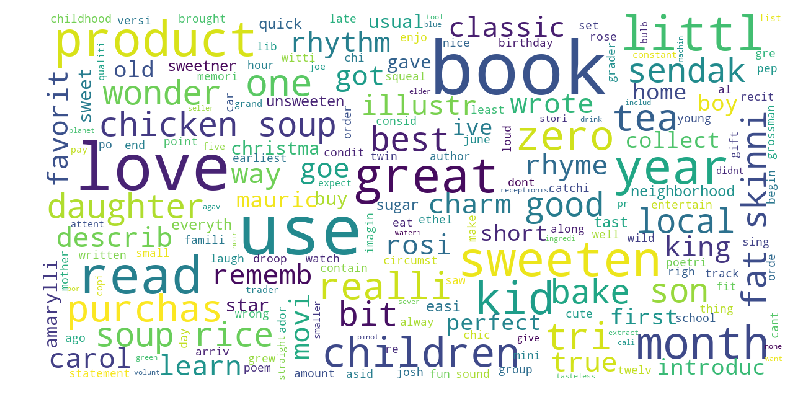

In [65]:
import matplotlib
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(final_data['CleanedText'])#final_data['CleanedText'])


## Observation

From the wordcloud above we can infer that :<br>
1) book, love, year are the most important words in the dataset.<br>
2) food, month, treat, dog, great are important words but less important than the words mentioned in point number 1.
3) Relative sizes of the words determine the importance of the word in a particular corpus. 

##  3.1.2 Word Cloud of Positive Reviews

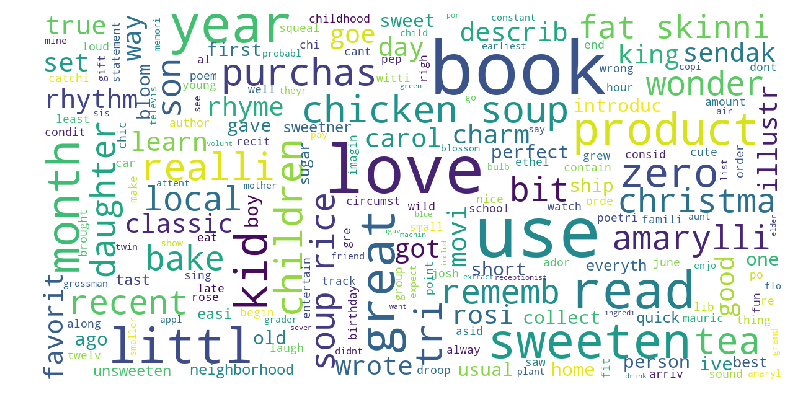

In [66]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(final_data.loc[final_data['Score']=='positive']['CleanedText'])#final_data['CleanedText'])


## Observation 

From the wordcloud above we can infer the following :<br>
1) book, love, food, great, treat  are the most important words in the context of positive reviews of the dataset.<br>
2) Relative sizes of the words determine the importance of the word in a particular corpus. In this case the corpus are all the    positive reviews of the dataset. 

## 3.1.3 WordCloud of Negative Reviews

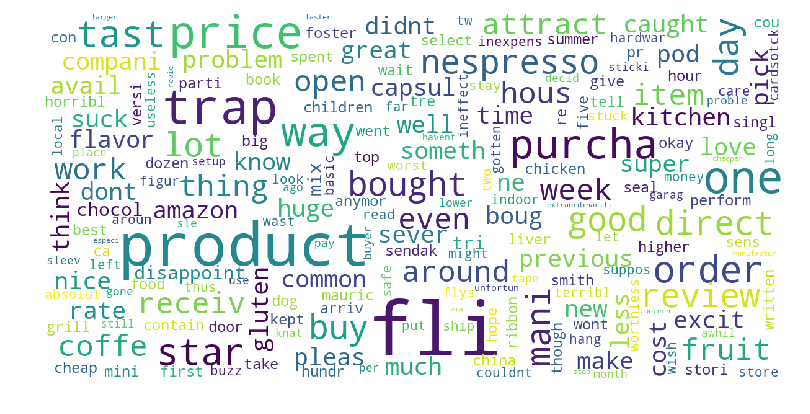

In [67]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(final_data.loc[final_data['Score']=='negative']['CleanedText'])#final_data['CleanedText'])


## Observation

From the wordcloud above we can infer the following :<br>
1) fli, trap, litter, food, product  are the most important words in the context of positive reviews of the dataset.<br>
2) Relative sizes of the words determine the importance of the word in a particular corpus. In this case the corpus are all the    negative reviews of the dataset. 

# 3.2 Analysis of Positive and Negative words in the Reviews

In [68]:
from collections import Counter
print("No. of positive words:",len(all_positive_words))
print("No. of negative words:",len(all_negative_words))
# print("Sample postive words",all_positive_words[:9])
# print("Sample negative words",all_negative_words[:9])
positive = Counter(all_positive_words)
print("\nMost Common postive words",positive.most_common(10))
negative = Counter(all_negative_words)
print("\nMost Common negative words",negative.most_common(10))

No. of positive words: 11610503
No. of negative words: 2354489

Most Common postive words [(b'like', 139429), (b'tast', 129047), (b'good', 112766), (b'flavor', 109624), (b'love', 107357), (b'use', 103888), (b'great', 103870), (b'one', 96726), (b'product', 91033), (b'tri', 86791)]

Most Common negative words [(b'tast', 34585), (b'like', 32330), (b'product', 28218), (b'one', 20569), (b'flavor', 19575), (b'would', 17972), (b'tri', 17753), (b'use', 15302), (b'good', 15041), (b'coffe', 14716)]


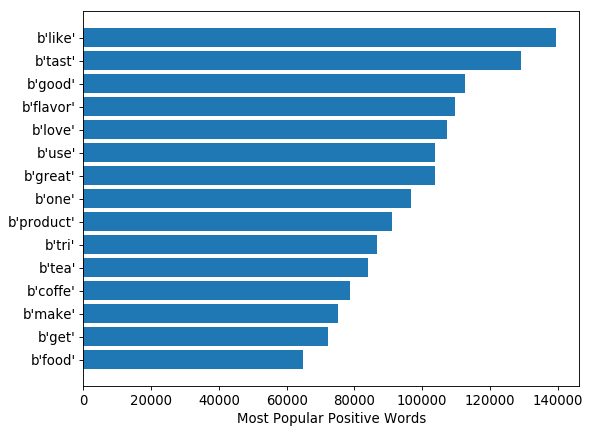

In [69]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pos_words = positive.most_common(15)
pos_words.sort(key=lambda x: x[1], reverse=False) 
words=[]
times=[]
for w,t in pos_words:
    words.append(w)
    times.append(t)
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words) 
plt.xlabel('Most Popular Positive Words')
plt.show()

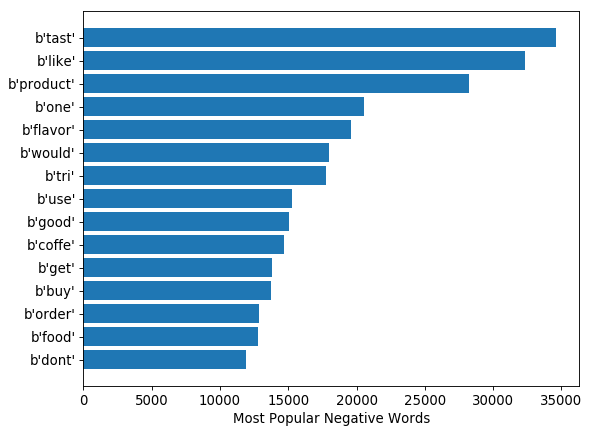

In [70]:
neg_words = negative.most_common(15)
neg_words.sort(key=lambda x: x[1], reverse=False) 
words=[]
times=[]
for w,t in neg_words:
    words.append(w)
    times.append(t)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words) 
plt.xlabel('Most Popular Negative Words')
plt.show()

## Observation

For both positive and negative reviews the most occurring words are : tast and like.<br>
1) 'like' is the most occurring words for the positive reviews.
2) 'tast' is the most occurring words for the negative reviews.


# 4. Bag of Words (BoW)

  <p>   Bag of Words (BoW) is an algorithm that counts how many times a word appears in a document. Those word counts allow us to compare documents and gauge their similarities for applications like search, document classification and topic modeling. BoW is a method for preparing text for input in a deep-learning net. BoW lists words with their word counts per document. In the table where the words and documents effectively become vectors are stored, each row is a word, each column is a document and each cell is a word count. Each of the documents in the corpus is represented by columns of equal length. Those are wordcount vectors, an output stripped of context.</p> 
     <p>Before they’re fed to the neural net, each vector of wordcounts is normalized such that all elements of the vector add up to one. Thus, the frequencies of each word is effectively converted to represent the probabilities of those words’ occurrence in the document. Probabilities that surpass certain levels will activate nodes in the net and influence the document’s classification.</p>
     
      Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. For example, if you have 3 documents-

D1 - “I am feeling very happy today”

D2 - “I am not well today”

D3 - “I wish I could go to play”

First, it creates a vocabulary using unique words from all the documents -

Unique list of words -

I am feeling very happy today not well wish could go to play

Then, for each word the frequency of the word in the corresponding document is inserted </p>

![title](https://qph.fs.quoracdn.net/main-qimg-513f40f3dd2ecf87e42d78ce7519aaf4-c)
<p> The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.</p>

## 4.1 Analysis of Unigram BOW

In [71]:
# Due to memory constraint and lack of gpu we are taking only first 2k datapoints of the dataset
final_data=final_data[0:2000]
# Code to implement the BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final_data['CleanedText'].values)
type(final_counts)

scipy.sparse.csr.csr_matrix

In [30]:
#The shape of output text of BOW vectorizer
final_counts.get_shape()

(2000, 6858)

In [31]:
#The number of unique words
final_counts.get_shape()[1]

6858

## 4.1.1  Applying TSNE on data created using BOW

In [32]:
label=final_data['Score'] # store the labels i.e positive or negative of finalized data in label 

## 4.1.2 Standardiation using Scikit-Learn

In [33]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler(with_mean=False).fit_transform(final_counts) # Performing Standardiation of the final data
print(standardized_data.shape) # Shape of the dataset after standardiation

(2000, 6858)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 4.1.3 TruncatedSVD using Scikit-Learn

In [34]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=50, random_state=0).fit_transform(standardized_data)

## 4.1.4 T-SNE using Scikit-Learn

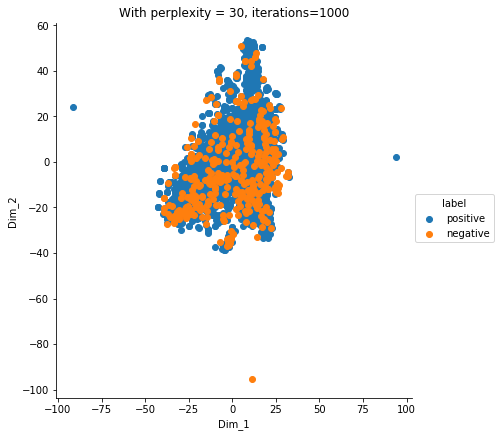

In [35]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 30
# Number of iterations = 1000
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(tsvd)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

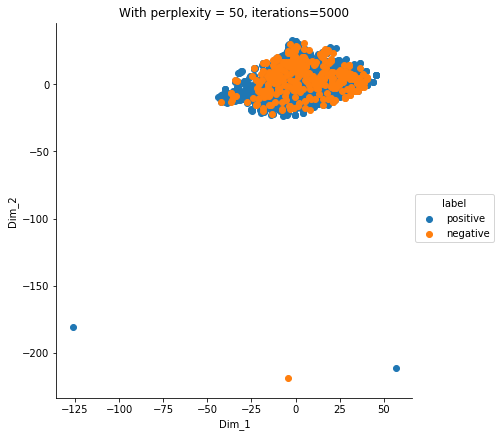

In [36]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 50
# Number of iterations = 5000

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=5000)

tsne_data = model.fit_transform(tsvd)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=5000')
plt.show()

## Observation
The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 5000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

## 4.2 Analysis of  Bigram BOW

In [38]:
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn
final_counts = count_vect.fit_transform(final_data['CleanedText'].values)
type(final_counts)

scipy.sparse.csr.csr_matrix

In [39]:
#The shape of output text of BOW vectorizer
final_counts.get_shape()

(2000, 76693)

In [40]:
#The number of unique words
final_counts.get_shape()[1]

76693

## T-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets. It has been applied on data sets with up to 30 million examples.

For further in depth concept please refer to this phenomenal paper : https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf



## 4.2.1 Applying TSNE on data created using BOW

In [41]:
label=final_data['Score'] # store the labels i.e positive or negative of finalized data in label 

## 4.2.2 Standardiation using Scikit-Learn

In [42]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler(with_mean=False).fit_transform(final_counts) # Performing Standardiation of the final data
print(standardized_data.shape) # Shape of the dataset after standardiation

(2000, 76693)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 4.2.3 TruncatedSVD using Scikit-Learn

In [43]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=50, random_state=0).fit_transform(standardized_data)

## 4.2.4 T-SNE using Scikit-Learn

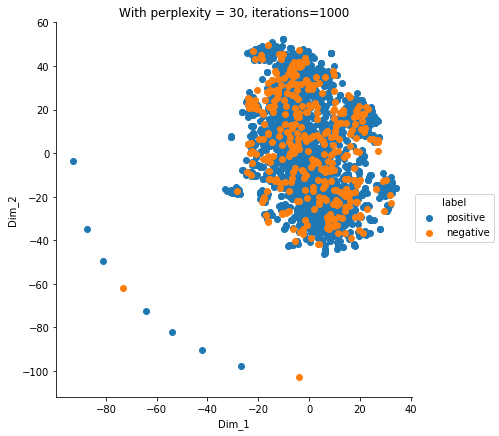

In [44]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 30
# Number of iterations = 1000
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(tsvd)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

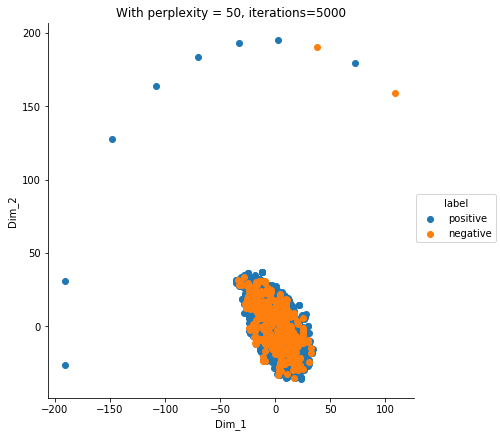

In [45]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 50
# Number of iterations = 5000

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=5000)

tsne_data = model.fit_transform(tsvd)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=5000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 5000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

# 5. TF-IDF

In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

## Term Frequency

Suppose we have a set of English text documents and wish to rank which document is most relevant to the query, "the brown cow". A simple way to start out is by eliminating documents that do not contain all three words "the", "brown", and "cow", but this still leaves many documents. To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency. However, in the case where the length of documents varies greatly, adjustments are often made (see definition below). The first form of term weighting is due to Hans Peter Luhn (1957) which may be summarized as:

<p>The weight of a term that occurs in a document is simply proportional to the term frequency</p>

## Inverse document frequency

Because the term "the" is so common, term frequency will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms "brown" and "cow". The term "the" is not a good keyword to distinguish relevant and non-relevant documents and terms, unlike the less-common words "brown" and "cow". Hence an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

<p>The specificity of a term can be quantified as an inverse function of the number of documents in which it occurs. </p>

## Formula

![title](https://skymind.ai/images/wiki/tfidf.png)

### Example

Suppose that we have term count tables of a corpus consisting of only two documents, as listed:

<table class="wikitable" style="float: right; margin-left: 1.5em; margin-right: 0; margin-top: 0;">
<caption>Document 2
</caption>
<tbody><tr>
<th>Term
</th>
<th>Term Count
</th></tr>
<tr>
<td>this</td>
<td>1
</td></tr>
<tr>
<td>is
</td>
<td>1
</td></tr>
<tr>
<td>another
</td>
<td>2
</td></tr>
<tr>
<td>example
</td>
<td>3
</td></tr></tbody></table>
<table class="wikitable" style="float: right; margin-left: 1.5em; margin-right: 0; margin-top: 0;">
<caption>Document 1
</caption>
<tbody><tr>
<th>Term
</th>
<th>Term Count
</th></tr>
<tr>
<td>this</td>
<td>1
</td></tr>
<tr>
<td>is
</td>
<td>1
</td></tr>
<tr>
<td>a
</td>
<td>2
</td></tr>
<tr>
<td>sample
</td>
<td>1
</td></tr></tbody></table>
<p>The calculation of tf–idf for the term "this" is performed as follows:</p>
The calculation of tf–idf for the term "this" is performed as follows:

In its raw frequency form, tf is just the frequency of the "this" for each document. In each document, the word "this" appears once; but as the document 2 has more words, its relative frequency is smaller.
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/16c015f44d033993b3e2ede79dac61c98bf96fcb)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/9587323bafed1255880bae568ed8c36222eb9665)

An idf is constant per corpus, and accounts for the ratio of documents that include the word "this". In this case, we have a corpus of two documents and all of them include the word "this".

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/d9cade99407a0e585a9bd7201d0b11056bf86354)

So tf–idf is zero for the word "this", which implies that the word is not very informative as it appears in all documents.
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/b2204ebc15347494e5beb337bb44df070c20528e)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/b0534e29ba724bedabc2af3be2064d7e71f3d35c)
A slightly more interesting example arises from the word "example", which occurs three times but only in the second document:
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/bbb87d4d366ac55ba7c95d813f044b9f7077b2d3)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/adbf6bc802f75c4281953c7ab7a25cb59bc75068)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/2d47d3b7373ec1a75121aebb62c22db147b67db9)

Finally,
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/c8bb6b1e5cb00d360f094832cae4cf31d472878b)
![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/bbc9714c472c85ebcbc1d93748bd5f2e00d49f6a)
(using the base 10 logarithm).

In [76]:
# Code to implement the TF-IDF
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2)) # using bigrams
final_tf_idf = tf_idf_vect.fit_transform(final_data['CleanedText'].values)
final_tf_idf.shape

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(2000, 76693)

In [77]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [78]:
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the number of unique words including both unigrams and bigrams  76693


In [79]:
features = tf_idf_vect.get_feature_names()
print("some sample features(unique words in the corpus)",features[100:110])

some sample features(unique words in the corpus) ['absolut useless', 'absolut wors', 'absolut yes', 'absorb', 'absorb liquid', 'absorb much', 'absorb nutrient', 'absorb odor', 'absorb poor', 'absorb sweatscoop']


In [80]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)

In [81]:
top_tfidf

,feature,tfidf
0,version paperback,0.167682
1,incorpor love,0.167682
2,two hand,0.167682
3,keep page,0.167682
4,kind flimsi,0.167682
5,page open,0.167682
6,book watch,0.167682
7,hard cover,0.167682
8,paperback seem,0.167682
9,flimsi take,0.167682


## 5.1 Applying TSNE on data created using TF-IDF

## 5.1.1 Standardiation using Scikit-Learn

In [82]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
print(standardized_data.shape)

(2000, 76693)


## 5.1.2 TruncatedSVD using Scikit-Learn


In [83]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=1000, random_state=42).fit_transform(standardized_data)

## 5.1.3 t-SNE using Scikit-Learn


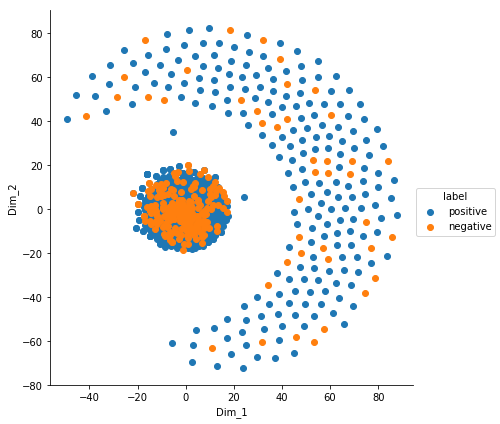

In [84]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 30
# Number of iterations = 1000

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(tsvd)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) The shape of the diagram is circular in nature.
2) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

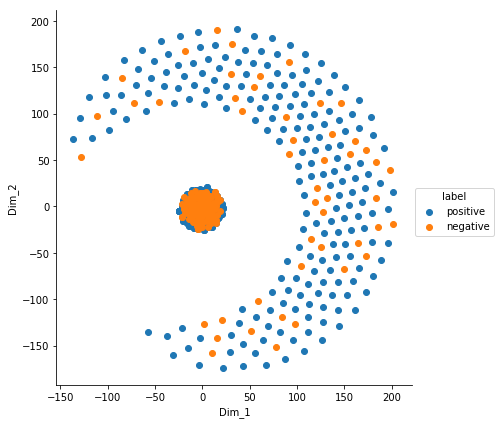

In [85]:
from sklearn.manifold import TSNE
# Code to implement the t-SNE using the following values of hyperparameters
# Dimension of the embedded space = 2
# Perplexity = 50
# Number of iterations = 5000

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=5000)

tsne_data = model.fit_transform(tsvd)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 5000. We can the following facts from the diagram:<br>
1) The shape of the diagram is circular in nature.
2) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

# 6. Word2Vec

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

<p>Word2vec was created by a team of researchers led by Tomas Mikolov at Google. The algorithm has been subsequently analysed and explained by other researchers.Embedding vectors created using the Word2vec algorithm have many advantages compared to earlier algorithms such as latent semantic analysis.</p>

![title](https://samyzaf.com/ML/nlp/word2vec2.png)

<p> In this figure, all the words are placed based on their word2vec values.<br> **Note:**  If the relation between two words in one pair is same as the relation between two words in another pair, then the vector joining the words in first pair will be parallel to the vector joining the words in second pair. Example: vector from king to man is parallel to the vector from queen to woman. <p>
[Refer Docs] :https://radimrehurek.com/gensim/models/word2vec.html

In [86]:
import gensim
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final_data['CleanedText'].values:
    list_of_sent.append(sent.split())

In [87]:
print(final_data['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [89]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [102]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2292
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'hes', 'learn', 'love', 'new', 'word', 'introduc', 'classic', 'will', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'movi', 'howev', 'miss', 'hard', 'cover', 'version', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand', 'keep', 'page', 'open', 'fun', 'way', 'children', 'month', 'year', 'poem', 'throughout']


In [103]:
w2v_model.wv.most_similar('tasti')

[('ice', 0.9994521141052246),
 ('crazi', 0.9993106126785278),
 ('let', 0.999309778213501),
 ('tast', 0.9993009567260742),
 ('trust', 0.9992994070053101),
 ('song', 0.9992984533309937),
 ('kid', 0.9992889761924744),
 ('broken', 0.9992877244949341),
 ('also', 0.9992841482162476),
 ('plus', 0.9992834329605103)]

## 6.1 Applying TSNE on data created using Word2Vec


##  6.1.1 Standardiation using Scikit-Learn

In [105]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

2000
50


In [106]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(sent_vectors)
print(standardized_data.shape)

(2000, 50)


## 6.1.2   T-SNE using Scikit-Learn


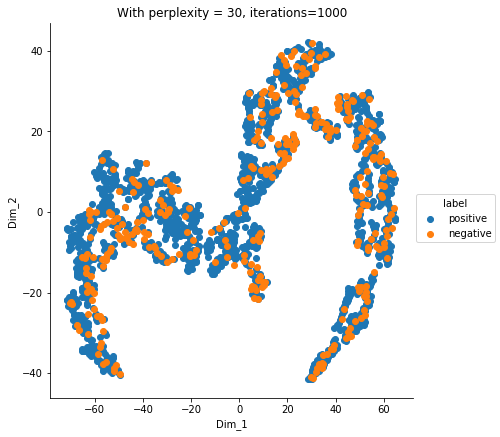

In [107]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

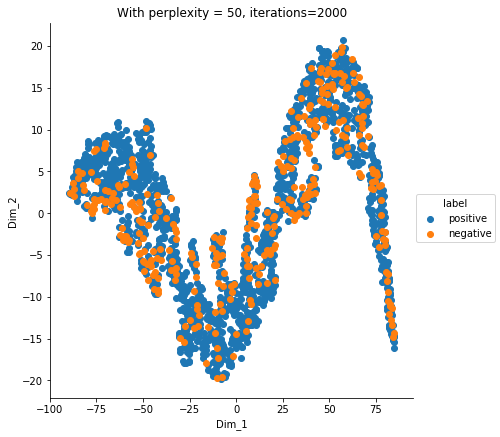

In [108]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=2000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=2000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 2000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

# 7. AvgWord2Vec

AverageWord2Vec is a simple technique in which we take the average of word2vec of all the words present in the sentence. 

It can be calculated as follows:

** AvgWord2Vec(sentence) = Summation of the word2vec of all the words / total number of words in the sentence ** <br>

Example:<br> Sentence :I am a boy <br>
**AvgWord2Vec = word2vec(I) + word2vec(am) + word2vec(a) + word2vec(boy) / 4 **





In [109]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

2000
50


## 7.1 Applying TSNE on data created using AvgWord2Vec


## 7.1.1 Standardiation using Scikit-Learn

In [110]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(sent_vectors)
print(standardized_data.shape)

(2000, 50)


## 7.1.2   t-SNE using Scikit-Learn

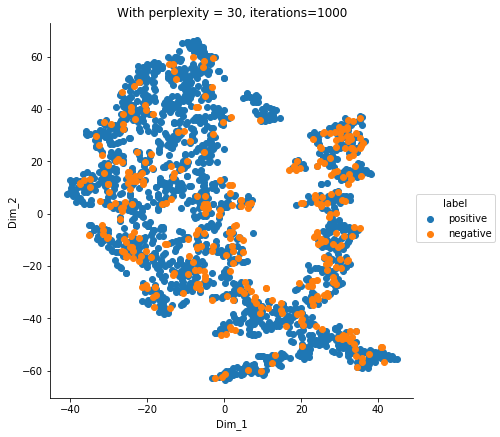

In [111]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

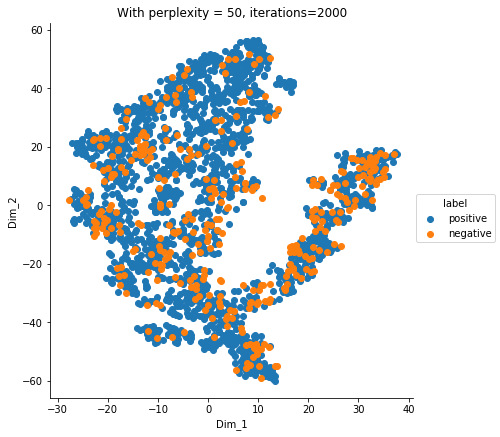

In [112]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=2000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=2000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 2000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

# 8. TF-IDF Weighted Word2Vec

It is a technique which uses both the concepts of tf-idf and word2vec. It uses the word2vec as weights. It can be written as follows : <br>

** tf-idfWeightedWord2vec = Sum ( tf-idf(word) X word2vec(word))  / Sum (tf-idf(word)) for all  the words**

In [113]:
# Code to implement TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

## 8.1 Applying TSNE on data created using TF-IDF Weighted Word2Vec


## 8.1.1 Standardiation using Scikit-Learn

In [114]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(tfidf_sent_vectors)
print(standardized_data.shape)

(2000, 50)


## 8.1.2 t-SNE using Scikit-Learn

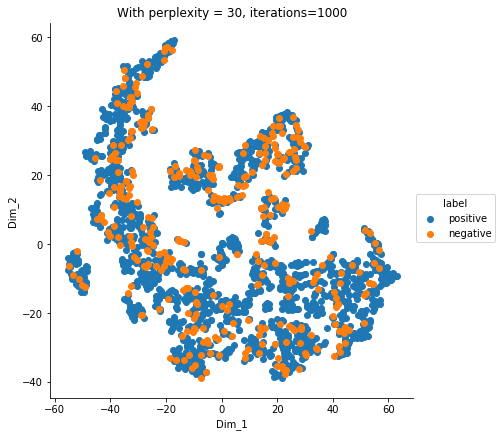

In [115]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


tsne_data = model.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, iterations=1000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=30 and number of iterations = 1000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 

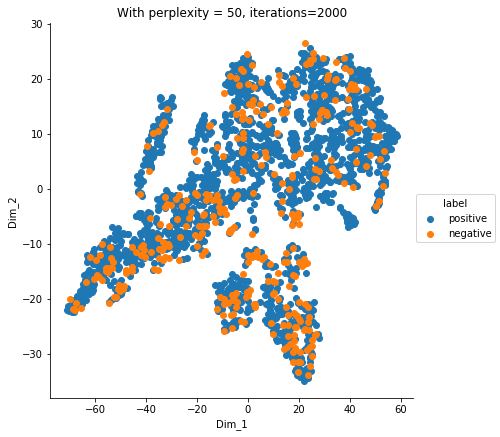

In [116]:
from sklearn.manifold import TSNE
import seaborn as sn
model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=2000)
# configuring the parameteres
# the number of components = 2
# perplexity = 50
# learning rate = 200
# Maximum number of iterations for the optimization = 2000

tsne_data = model.fit_transform(standardized_data)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, iterations=2000')
plt.show()

## Observation

The above diagram is obtained after tsne has been applied on BOW with perplexity=50 and number of iterations = 2000. We can the following facts from the diagram:<br>
1) Since the positive and negative points or clusters overlap with one another it is not possible to classify the points in any    way(using linear classifier) using these hyperparameters. 


# Conclusion

From the above observations we can infer the following results : <br>

1) In each of the techniques only the shape of the positive and negative clusters change with the change in hyperparameters.<br>
2) In all the techniques we have used two instances of hyperparameters and applied it for tsne. But in all the cases the clusters overlap in such a way that it is not possible to classify the positive and negative datapoints using linear classifiers.<br>
3) It is not possible to conclude from the two instances in each technique that the clusters will never be formed in such a way that it will never be possible to classify them in any way. We cannot infer with certainty that it is non-linearly seperable unless and until we run tsne several times with different values of hyper-parameters.<br>
4) From our observations it is not possible to decide which, out of the three techniques will be beneficial or better to carry out the classification task. 
